# Scikit-Learn course 0
## An end-to-end Scikit-Learn workflow

- O. An end-to-end Scikit-Learn
- I. Getting data ready
- II. Chossing a machine learning model
- III. Making predictions with a model (using patterns)
- IV. Evaluating modele predictions
- V. Improving model predictions
- VI. Saving and loading models
- VII. Putting it all together

![.](images/sklearn-workflow.png)

![.](images/Features-and-Labels-in-a-Dataset-i2tutorials.png)

## Features = Data
## Label = Target

In [1]:
# Standards imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [250]:
# ---> y (axis=1)
# |
# |
# x (axis=0)

# 0. An end-to-end Scikit-Learn workflow

## 1. Get data ready

In [2]:
# 1. get data ready
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
y = heart_disease.target # target colomn
X = heart_disease.drop("target",axis=1) # datafram with out target column
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # 20% data for testing
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 2. choose yhe right model an hyperparameters

In [5]:
# 2. choose yhe right model an hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() # Create the model (= clf)
# 'clf' for classifier, sometime call model 

# we keep default hyperparameters, for now (gonna change it in 5.impove model)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3. Fit the model from the training data

In [21]:
# 3. Fit the model from the training data
clf.fit(X_train, y_train) # find the patern in training data
# the model gonna train on the X data to find y data
# X is like an exercice and y is the correction, which is given for training

RandomForestClassifier()

In [7]:
# make prediction
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

## 4. Evaluate the model on training & test data

In [8]:
# 4. Evaluate the model on training & test data
clf.score(X_train, y_train)

1.0

In [22]:
clf.score(X_test, y_test) 
# with X_test model predict result (y_preds) and compare with y_test (true result)

0.8852459016393442

In [239]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [240]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        34
           1       0.77      0.85      0.81        27

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [241]:
confusion_matrix(y_test, y_preds)
# diag elements has to be the highter possible
# ex :
# [[27,  7],
# [ 4, 23]]
# here for the first line, 27 have been well predict and 7 not 
# 7 have been predict to be in the seconde classe, while they are in the first one 

# 1st [[27,  7],
# 2nd [ 4, 23]]
#      1st 2nd

array([[27,  7],
       [ 4, 23]])

In [242]:
accuracy_score(y_test, y_preds)

0.819672131147541

## 5. Improve a model

In [243]:
# 5. Improve a model
# Try to change the default hyperparameters
# Try differtenr amount of n_estimators
np.random.seed(0)
n_estimators = {}
for i in range(10,110,10):
    print(f"Trying model with n_estimator = {i} : ", end="")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    score = round(clf.score(X_test,y_test)*100,2) 
    n_estimators[i] = score
    print(score,"%")
    
n_estimators_sort = sorted(n_estimators.items(), key=lambda x:x[1])
n_estimators_sort

Trying model with n_estimator = 10 : 77.05 %
Trying model with n_estimator = 20 : 83.61 %
Trying model with n_estimator = 30 : 81.97 %
Trying model with n_estimator = 40 : 83.61 %
Trying model with n_estimator = 50 : 81.97 %
Trying model with n_estimator = 60 : 77.05 %
Trying model with n_estimator = 70 : 83.61 %
Trying model with n_estimator = 80 : 81.97 %
Trying model with n_estimator = 90 : 78.69 %
Trying model with n_estimator = 100 : 78.69 %


[(10, 77.05),
 (60, 77.05),
 (90, 78.69),
 (100, 78.69),
 (30, 81.97),
 (50, 81.97),
 (80, 81.97),
 (20, 83.61),
 (40, 83.61),
 (70, 83.61)]

In [261]:
best_n_estimators = n_estimators_sort[-1][0]
score_best_n_estimators = []
for _ in range(1000):
    clf = RandomForestClassifier(n_estimators=best_n_estimators).fit(X_train,y_train)
    score_best_n_estimators.append(clf.score(X_test, y_test))
    
clf.score(X_test, y_test),best_n_estimators

(0.7868852459016393, 70)

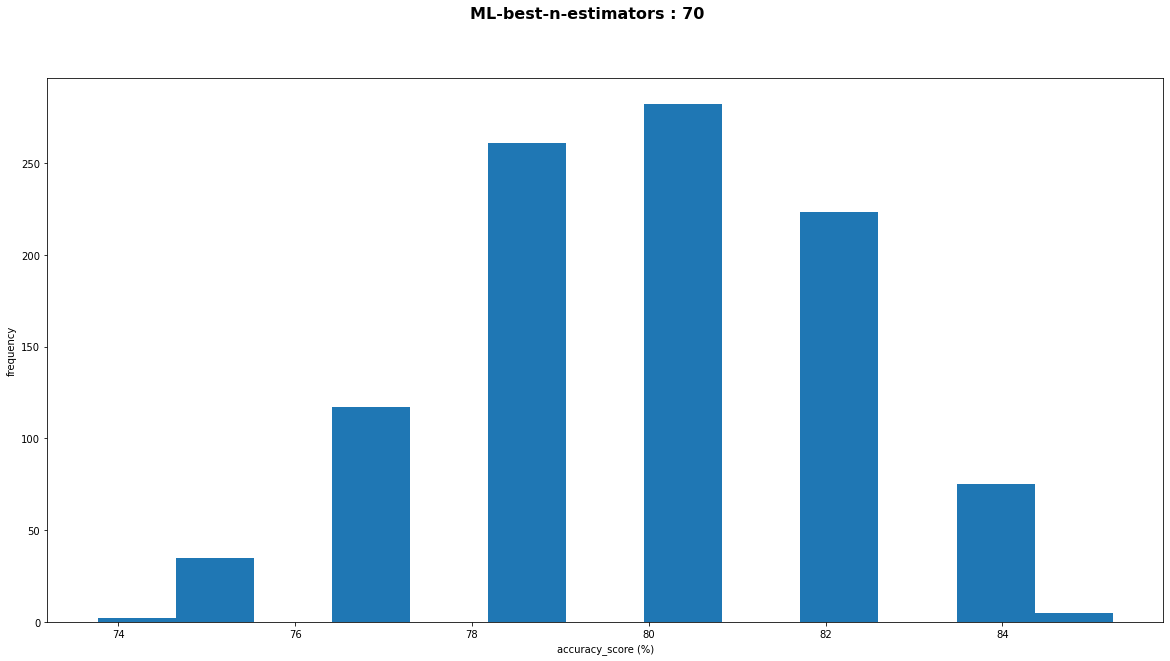

In [278]:
fig, ax = plt.subplots(figsize=(20,10))

ax.hist(np.array(score_best_n_estimators)*100,bins=13)

fig.suptitle(f"ML-best-n-estimators : {best_n_estimators}", fontsize=16, fontweight="bold");

ax.set(
      xlabel="accuracy_score (%)",
      ylabel="frequency")

fig.savefig("images/ML-best-n-estimators.png");

## 6. Save model and load it

In [245]:
import pickle
pickle.dump(clf,open("model/random_forest_model_1.pkl","wb")) #wb=write binary

In [246]:
loaded_model = pickle.load(open("model/random_forest_model_1.pkl","rb"))
loaded_model.score(X_test, y_test)

0.8360655737704918

## 7. Conclusion

- Get data ready : 
        - df = pd.read_csv()
        - y = df.data_y
        - X = df.drop("data_y",axis=1)
        - X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

- Chose model, train and evaluate :
        - clf = RandomForestClassifier()
        - clf.fit(X_train, y_train)
        - y_preds = clf.predict(X_test)
        - clf.score(X_test, y_test) or accuracy_score(y_test, y_preds)

- Improve model : modify hyperparameters
        - clf.get_params()
        - ex : chose the best n_estimators by testing

- Save and load model :
        - pickle.dump(clf,open(path,"wb"))
        - loaded_model = pickle.load(open(path,"rb"))
        - loaded_model.score(X_test, y_test)


## check version

In [247]:
!conda list python 

# packages in environment at /Users/dorian/Documents/CODE/python/python_datascience/.env:
#
# Name                    Version                   Build  Channel
ipython                   8.3.0            py39hecd8cb5_0  
ipython_genutils          0.2.0              pyhd3eb1b0_1  
python                    3.9.12               hdfd78df_1  
python-dateutil           2.8.2              pyhd3eb1b0_0  
python-fastjsonschema     2.15.1             pyhd3eb1b0_0  


In [248]:
!conda list scikit-learn

# packages in environment at /Users/dorian/Documents/CODE/python/python_datascience/.env:
#
# Name                    Version                   Build  Channel
scikit-learn              1.0.2            py39hae1ba45_1  


In [249]:
!conda search scikit-learn --info

Loading channels: done
scikit-learn 0.19.0 py27_nomklh2463853_2
----------------------------------------
file name   : scikit-learn-0.19.0-py27_nomklh2463853_2.conda
name        : scikit-learn
version     : 0.19.0
build       : py27_nomklh2463853_2
build number: 2
size        : 3.7 MB
license     : BSD 3-Clause
subdir      : osx-64
url         : https://repo.anaconda.com/pkgs/main/osx-64/scikit-learn-0.19.0-py27_nomklh2463853_2.conda
md5         : 869bc16836ecfa5d84876ba117fba6ff
timestamp   : 2017-11-03 18:59:04 UTC
dependencies: 
  - libcxx >=4.0.1
  - libopenblas >=0.2.20,<0.2.21.0a0
  - numpy >=1.9.3,<2.0a0
  - python >=2.7,<2.8.0a0
  - scipy
  - blas * openblas


scikit-learn 0.19.0 py27h54286d7_2
----------------------------------
file name   : scikit-learn-0.19.0-py27h54286d7_2.conda
name        : scikit-learn
version     : 0.19.0
build       : py27h54286d7_2
build number: 2
size        : 3.7 MB
license     : BSD 3-Clause
subdir      : osx-64
url         : https://repo.anaconda.

In [253]:
import sklearn
print(sklearn.__version__)

1.0.2
